In [1]:
# importing the libraries

from pycbc.types import timeseries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import signal
import matplotlib.pyplot as plt
from numpy.random import uniform, randint

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


The following functions simulate false waveforms in a random manner.

The waveform is saved under '/Users/DRRRR/Desktop/pyCBC/false_signal.txt'

It can be loaded as pycbc time series using load_timeseries('/Users/DRRRR/Desktop/pyCBC/false_signal.txt').

The only argument required is the length of the waveform t.

The false waveforms have amlitude scale: 1

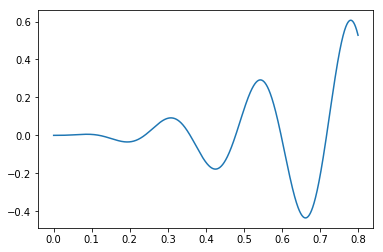

In [523]:
# randomly generate one of the following 6 types of signals.
def random_false_sig(t):
    i = randint(0,6)
    if i==0:
        damp_sin(t)
    elif i==1:            
        exp_sin(t)
    elif i==2:            
        mysquare(t)
    elif i==3:            
        mysawtooth(t)
    elif i==4:            
        myGaussPulse(t)
    else:            
        myChirp(t)

random_false_sig(0.8)

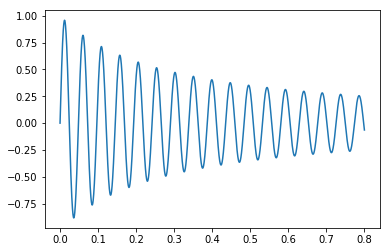

In [509]:
def damp_sin(t):
    # simulate a damping sinusoidal time series
    nsample = 4096
    a = uniform(0.0,200.0)   # frequency factor
    b = uniform(0.0,250.0)   # damping factor
    
    x = np.linspace(0, t, nsample)
    y = np.sin(x*a) / (x*b+1)
    data = pd.Series(y, index=x)
    data.to_csv('/Users/DRRRR/Desktop/pyCBC/false_signal.txt',sep=' ')
    
    plt.plot(x, y)
    plt.show()

damp_sin(0.8)

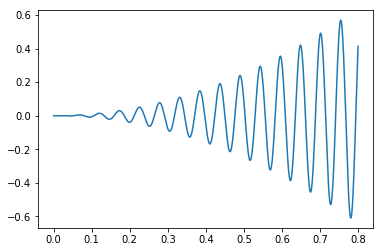

In [510]:
def exp_sin(t):
    # simulate a damping sinusoidal time series
    nsample = 4096
    a = uniform(0.0,200.0)   # frequency factor
    b = randint(1,5)   # envelop exponential function order
    
    x = np.linspace(0, t, nsample)
    y = np.sin(x*a) * (x**b)
    data = pd.Series(y, index=x)
    data.to_csv('/Users/DRRRR/Desktop/pyCBC/false_signal.txt',sep=' ')
    
    plt.plot(x, y)
    plt.show()
    
exp_sin(0.8)

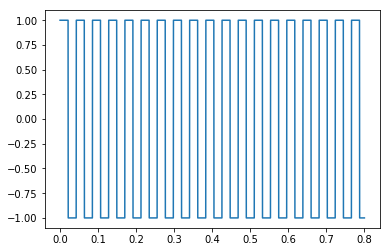

In [511]:
def mysquare(t): 
    # simulate a square wave 
    nsample = 4096
    a = randint(1,50)    # frequency factor
    b = randint(0,10)   # periodity information
    
    x = np.linspace(0, t, nsample)
    sig = np.sin(b * np.pi * x)
    y = signal.square(a * np.pi * x, duty=(sig + 1)/2)
    
    data = pd.Series(y, index=x)
    data.to_csv('/Users/DRRRR/Desktop/pyCBC/false_signal.txt',sep=' ')
    
    plt.plot(x, y)
    plt.show()

mysquare(0.8)

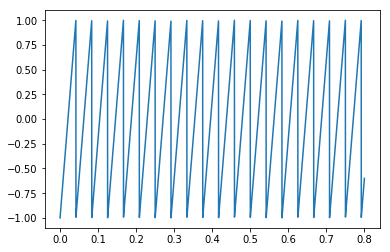

In [512]:
def mysawtooth(t): 
    # simulate a square wave 
    nsample = 4096
    a = randint(1,50)   # frequency factor
    
    x = np.linspace(0, t, nsample)
    y = signal.sawtooth(a * np.pi * x) 
    
    data = pd.Series(y, index=x)
    data.to_csv('/Users/DRRRR/Desktop/pyCBC/false_signal.txt',sep=' ')
    
    plt.plot(x, y)
    plt.show()

mysawtooth(0.8)

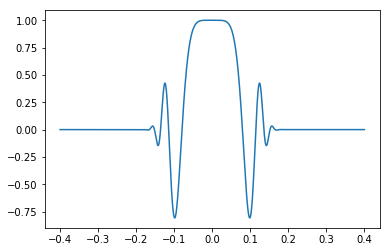

In [2]:
def myGaussPulse(t):
    # simulate a Gaussian pulse 
    nsample = 4096   
    fc = randint(1,500)   # widness of waveform
    power = randint(1,6)
    even = randint(0,2)
    
    x = np.linspace(-t/2.0, t/2.0, nsample)
    i, q, e = signal.gausspulse(x**power, fc=fc, retquad=True, retenv=True)
    if even == 0:
        data = pd.Series(i, index=x)
        plt.plot(x, i)
    else:
        data = pd.Series(q, index=x)
        plt.plot(x, 1)
    data.to_csv('/Users/DRRRR/Desktop/pyCBC/false_signal.txt',sep=' ')

    plt.show()

myGaussPulse(0.8)

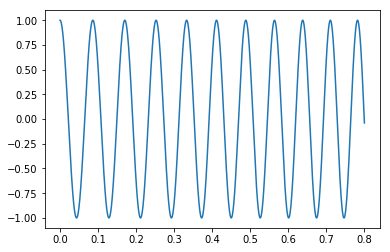

In [514]:
def myChirp(t):
    # Generate a linear chirp
    nsample = 4096  
    f0 = np.random.uniform(0.0,40.0)   # f0 how fast change, the lower the faster
    f1 = np.random.uniform(0.0,20.0)   # f1 frequency information

    x = np.linspace(0, t, nsample)
    y = signal.chirp(x, f0=f0, f1=f1, t1=np.random.uniform(0.0,0.8), method='linear')
    data = pd.Series(y, index=x)
    data.to_csv('/Users/DRRRR/Desktop/pyCBC/false_signal.txt',sep=' ')
    
    plt.plot(x, y)
    plt.show()

myChirp(0.8)
    


In [541]:
import pycbc.noise
import pycbc.psd
import pycbc.filter
import pylab
from pycbc.filter import sigma
from pycbc.waveform import get_td_waveform
from pycbc.psd import interpolate
from pycbc.types.timeseries import load_timeseries

In [580]:
# return the time inverse of the gravitational wave template: "flip" the template

def flip_gw(hp):  
    data = pd.Series(np.flip(np.asarray(hp)), index=hp.sample_times)
    data.to_csv('/Users/DRRRR/Desktop/pyCBC/flip_gw.txt',sep=' ')
    flipped = load_timeseries('/Users/DRRRR/Desktop/pyCBC/flip_gw.txt')
    flipped.start_time = 0
    return flipped

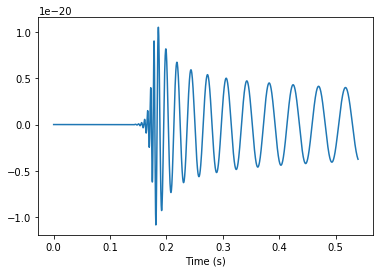

In [581]:
# example

hp,hc=get_td_waveform(approximant="SEOBNRv4_opt",
                             mass1=40,    
                             mass2=55,
                             delta_t=1.0/4096,
                             f_lower=20,
                             distance=100)

flipped = flip_gw(hp)
pylab.plot(flipped.sample_times, flipped) 
pylab.xlabel("Time (s)")
pylab.show()